# **Predict Employee Attrition**
---

# Import Library

In [846]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [847]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [848]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Employee-Attrition/main/Dataset/hr_employee_retention_dataset.csv'
df = pd.read_csv(link)

In [849]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
147,brainyLlama9,100884,Menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,3,5.0,0.0,0.0,20.0,+6285503547xxx,brainyLlama9557@gmail.com,Sarjana,1,NaN,Product Design (UI & UX),1969-02-09,2012-03-07,2014-02-01,2016-4-24
71,zestyPorpoise7,105688,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Timur,Employee_Referral,3,3.0,0.0,0.0,3.0,+6289655446xxx,zestyPorpoise7101@gmail.com,Magister,1,NaN,masih_bekerja,1978-08-25,2014-3-31,2020-01-11,-
47,wingedPorpoise5,106141,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Senior_level,Bagus,Jakarta Barat,Website,4,3.0,0.0,0.0,6.0,+6289691256xxx,wingedPorpoise5929@outlook.com,Sarjana,1,NaN,masih_bekerja,1975-10-22,2015-2-16,2020-1-23,-
35,decimalAbalone6,110848,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Pusat,LinkedIn,3,3.0,0.0,0.0,20.0,+6283327274xxx,decimalAbalone6779@outlook.com,Magister,1,NaN,masih_bekerja,1986-05-25,2014-05-12,2020-02-07,-
92,boredHyena0,101306,Menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,3.0,0.0,0.0,17.0,+6285758275xxx,boredHyena0206@hotmail.com,Sarjana,1,NaN,masih_bekerja,1952-02-11,2012-5-14,2014-07-02,-


# Data Understanding

## Features Definition

| Nama Fitur                         | Deskripsi Fitur                                 |
|------------------------------------|-------------------------------------------------|
| Username                           | Username karyawan                               |
| EnterpriseID                       | Nomor induk karyawan                            |
| StatusPernikahan                   | Status pernikahan karyawan                      |
| JenisKelamin                       | Jenis kelamin karyawan                          |
| StatusKepegawaian                  | Status kepegawaian karyawan                     |
| Pekerjaan                          | Posisi pekerjaan karyawan                       |
| JenjangKarir                       | Tingkat karir karyawan                          |
| PerformancePegawai                 | Nilai kinerja karyawan                          |
| AsalDaerah                         | Asal daerah karyawan                            |
| HiringPlatform                     | Platform yang digunakan untuk merekrut karyawan |
| SkorSurveyEngagement               | Skor survei keterlibatan karyawan               |
| SkorKepuasanPegawai                | Skor kepuasan karyawan                          |
| JumlahKeikutsertaanProjek          | Jumlah proyek yang diikuti oleh karyawan        |
| JumlahKeterlambatanSebulanTerakhir | Jumlah keterlambatan bulanan terbaru karyawan   |
| JumlahKetidakhadiran               | Jumlah ketidakhadiran karyawan                  |
| NomorHP                            | Nomor ponsel karyawan                           |
| Email                              | Alamat email karyawan                           |
| TingkatPendidikan                  | Tingkat pendidikan karyawan                     |
| PernahBekerja                      | Pengalaman kerja karyawan                       |
| IkutProgramLOP                     | Partisipasi dalam program LOP                   |
| AlasanResign                       | Alasan pengunduran diri karyawan                |
| TanggalLahir                       | Tanggal lahir karyawan                          |
| TanggalHiring                      | Tanggal perekrutan karyawan                     |
| TanggalPenilaianKaryawan           | Tanggal penilaian kinerja karyawan              |
| TanggalResign                      | Tanggal pengunduran diri karyawan               |

## Dimensions of the DataFrame

In [850]:
df.shape

(287, 25)

In [851]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 287
Jumlah kolom: 25


## Data Types of the Features

In [852]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `Username`, `EnterpriseID`, `NomorHP`, dan `Email` hanya berisi identifikasi unik untuk setiap karyawan tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.
- Fitur `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, dan `JumlahKetidakhadiran` seharusnya memiliki tipe data integer.
- Fitur `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, dan `TanggalResign` seharusnya memiliki tipe data datetime.
- Fitur `IkutProgramLOP` hanya memiliki 29 data yang _non-null_.

In [853]:
# Drop columns
df.drop(columns=['Username', 'EnterpriseID', 'NomorHP', 'Email'], inplace=True)

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 282 non-null    float64
 10  JumlahKeikutsertaanProjek           284 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  286 non-n

# Data Preprocessing

## Data Cleaning

### Number of Unique Classes

In [855]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

TanggalLahir                          284
TanggalPenilaianKaryawan              127
TanggalHiring                          97
TanggalResign                          53
JumlahKetidakhadiran                   22
Pekerjaan                              14
AlasanResign                           11
JumlahKeikutsertaanProjek               9
HiringPlatform                          9
JumlahKeterlambatanSebulanTerakhir      7
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
AsalDaerah                              5
PerformancePegawai                      5
StatusPernikahan                        5
TingkatPendidikan                       3
JenjangKarir                            3
StatusKepegawaian                       3
JenisKelamin                            2
PernahBekerja                           2
IkutProgramLOP                          2
dtype: int64

In [856]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,StatusPernikahan,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
1,JenisKelamin,"[Pria, Wanita]"
2,StatusKepegawaian,"[Outsource, FullTime, Internship]"
3,Pekerjaan,"[Software Engineer (Back End), Data Analyst, S..."
4,JenjangKarir,"[Freshgraduate_program, Senior_level, Mid_level]"
5,PerformancePegawai,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
6,AsalDaerah,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
7,HiringPlatform,"[Employee_Referral, Website, Indeed, LinkedIn,..."
8,SkorSurveyEngagement,"[4, 3, 2, 1, 5]"
9,SkorKepuasanPegawai,"[4.0, 3.0, 5.0, nan, 2.0, 1.0]"


🔽 `StatusPernikahan`

In [857]:
df['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya', '-'],
      dtype=object)

In [858]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace(['-', 'Lainnya'], 'Belum_menikah')
df['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai'], dtype=object)

🔽 `Pekerjaan`

In [859]:
df['Pekerjaan'].unique()

array(['Software Engineer (Back End)', 'Data Analyst',
       'Software Engineer (Front End)', 'Product Manager',
       'Software Engineer (Android)', 'Scrum Master',
       'Product Design (UX Researcher)', 'Product Design (UI & UX)',
       'Digital Product Manager', 'Data Engineer',
       'Software Engineer (iOS)', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

In [860]:
df['Pekerjaan'] = df['Pekerjaan'].replace({'Software Engineer (Back End)'   : 'Software Engineer',
                                           'Software Engineer (Front End)'  : 'Software Engineer',
                                           'Software Engineer (Android)'    : 'Software Engineer',
                                           'Software Engineer (iOS)'        : 'Software Engineer',
                                           'Product Design (UX Researcher)' : 'UI/UX Researcher',
                                           'Product Design (UI & UX)'       : 'UI/UX Designer',
                                           'Digital Product Manager'        : 'Product Manager'})
df['Pekerjaan'].unique()

array(['Software Engineer', 'Data Analyst', 'Product Manager',
       'Scrum Master', 'UI/UX Researcher', 'UI/UX Designer',
       'Data Engineer', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

🔽 `PerformancePegawai`

In [861]:
df['PerformancePegawai'].unique()

array(['Sangat_bagus', 'Sangat_kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

🔎 Observasi
- Pada fitur `PerformancePegawai` akan dilakukan _encoding_ dan diubah nama fiturnya menjadi `SkorPerformaPegawai`.

In [862]:
# Encode
df['PerformancePegawai'] = df['PerformancePegawai'].replace({'Sangat_kurang' : 1,
                                                             'Kurang'        : 2,
                                                             'Biasa'         : 3,
                                                             'Bagus'         : 4,
                                                             'Sangat_bagus'  : 5})
# Rename column
df.rename(columns={'PerformancePegawai' : 'SkorPerformaPegawai'}, inplace=True)
df['SkorPerformaPegawai'].unique()

array([5, 1, 4, 3, 2], dtype=int64)

🔽 `TingkatPendidikan`

In [863]:
df['TingkatPendidikan'].unique()

array(['Magister', 'Sarjana', 'Doktor'], dtype=object)

In [864]:
df['TingkatPendidikan'] = df['TingkatPendidikan'].replace({'Sarjana'  : 'S1',
                                                           'Magister' : 'S2',
                                                           'Doktor'   : 'S3'})
df['TingkatPendidikan'].unique()

array(['S2', 'S1', 'S3'], dtype=object)

🔽 `PernahBekerja`

In [865]:
df['PernahBekerja'].unique()

array(['1', 'yes'], dtype=object)

In [866]:
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', '1').astype('int64')
df['PernahBekerja'].unique()

array([1], dtype=int64)

🔎 Observasi
- Pada fitur `PernahBekerja` hanya memiliki nilai tunggal, yaitu 1, sehingga fitur ini akan dihapus.

In [867]:
# Drop column
df.drop(columns=['PernahBekerja'], inplace=True)

🔽 `AlasanResign`

In [868]:
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

In [869]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']['Pekerjaan'].value_counts()

Pekerjaan
Software Engineer    3
UI/UX Designer       1
Name: count, dtype: int64

In [870]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']['TanggalResign'].value_counts()

TanggalResign
2016-08-07    1
2017-12-15    1
2016-4-24     1
2018-04-01    1
Name: count, dtype: int64

🔎 Observasi
- Pada fitur `AlasanResign` terdapat kategori yang tidak sesuai, yaitu "Product Design (UI & UX)" kemungkinan terjadi salah _input_, sehingga kategori ini akan dikelompokkan ke dalam kategori "jam_kerja".
- Selain itu, untuk tujuan penyederhanaan, maka beberapa kategori juga akan dikelompokkan ulang, seperti:
    - `tidak_bisa_remote` → `jam_kerja`,
    - `internal_conflict` → `konflik_internal`,
    - `leadership` → `konflik_internal`,
    - `toxic_culture` atau _toxic work environment_ → `konflik_internal`,
    - `tidak_bahagia` → `konflik_internal`,
    - `apresiasi` → `masalah_karier`,
    - `kejelasan_karir` → `masalah_karier`, dan
    - `ganti_karir` → `masalah_karier`.

In [871]:
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (UI & UX)' : 'jam_kerja',
                                                 'tidak_bisa_remote'        : 'jam_kerja',
                                                 'internal_conflict'        : 'konflik_internal',
                                                 'leadership'               : 'konflik_internal',
                                                 'toxic_culture'            : 'konflik_internal',
                                                 'tidak_bahagia'            : 'konflik_internal',
                                                 'apresiasi'                : 'masalah_karier',
                                                 'kejelasan_karir'          : 'masalah_karier',
                                                 'ganti_karir'              : 'masalah_karier'})
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja       132
konflik_internal     31
jam_kerja            31
masalah_karier       27
Name: count, dtype: int64

🔽 `TanggalResign`

In [872]:
df[df['TanggalResign'] == '-'].count()

StatusPernikahan                      198
JenisKelamin                          198
StatusKepegawaian                     198
Pekerjaan                             198
JenjangKarir                          198
SkorPerformaPegawai                   198
AsalDaerah                            198
HiringPlatform                        198
SkorSurveyEngagement                  198
SkorKepuasanPegawai                   194
JumlahKeikutsertaanProjek             195
JumlahKeterlambatanSebulanTerakhir    197
JumlahKetidakhadiran                  194
TingkatPendidikan                     198
IkutProgramLOP                         15
AlasanResign                          132
TanggalLahir                          198
TanggalHiring                         198
TanggalPenilaianKaryawan              198
TanggalResign                         198
dtype: int64

In [873]:
df[df['TanggalResign'] == '-']['AlasanResign'].value_counts()

AlasanResign
masih_bekerja    132
Name: count, dtype: int64

### Detect Missing Values

In [874]:
# Check the features that have missing values
print(df.isna().values.any())

# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

True


,Feature Name,Total,Percentage (%)
0,IkutProgramLOP,258,89.90
1,AlasanResign,66,23.00
2,JumlahKetidakhadiran,6,2.09
3,SkorKepuasanPegawai,5,1.74
4,JumlahKeikutsertaanProjek,3,1.05
5,JumlahKeterlambatanSebulanTerakhir,1,0.35


🔎 Observasi
- Terdapat _null_ atau _missing values_ pada beberapa fitur, seperti `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, dan `JumlahKetidakhadiran`, yang jumlahnya kurang dari 2,5% dan kita akan mengganti nilai-nilai tersebut dengan median, karena lebih _robust_.
- Pada fitur `AlasanResign`, sebanyak 23% _null_ akan diganti dengan modus—kategori "masih_bekerja".
- Fitur `IkutProgramLOP` akan dihapus, karena memiliki hampir 90% _null_.

🔽 `AlasanResign`

In [875]:
df['AlasanResign'].isna().value_counts()

AlasanResign
False    221
True      66
Name: count, dtype: int64

In [876]:
df['AlasanResign'].value_counts(normalize=True).round(2).head(1)

AlasanResign
masih_bekerja    0.6
Name: proportion, dtype: float64

In [877]:
df['AlasanResign'].mode()

0    masih_bekerja
Name: AlasanResign, dtype: object

In [878]:
# Fill missing values with mode
df['AlasanResign'].fillna('masih_bekerja', inplace=True)

🔽 `Resigned`

Kita membuat fitur target, yaitu `Resigned` dari fitur `TanggalResign`.

In [879]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')
df['Resigned'] = np.where((df['TanggalResign'].isna()) & (df['AlasanResign'] == 'masih_bekerja'), 0, 1).astype('int64')
df['Resigned'].value_counts()

Resigned
0    198
1     89
Name: count, dtype: int64

🔎 Observasi
- Jika fitur `TanggalResign` yang memiliki nilai "-" dan `AlasanResign` adalah "masih_bekerja", maka karyawan tersebut masih bekerja di perusahaan.

In [880]:
# Fill missing values with median
df['SkorKepuasanPegawai'].fillna(value=df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(value=df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(value=df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(value=df['JumlahKetidakhadiran'].median(), inplace=True)

# Drop column
df.drop(columns=['IkutProgramLOP'], inplace=True)

# Recheck
df.isna().sum()

StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
SkorPerformaPegawai                     0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
Resigned                                0
dtype: int64

✅ Secara umum, dataset sudah bersih dari data yang kosong, kecuali pada fitur `TanggalResign` tidak dilakukan _handling missing values_.

### Detect Duplicate Values

In [881]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

False


0

✅ Dataset bebas dari _duplicate values_.

### Fix Data Types

In [882]:
# Fix dtype: float to integer
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].astype('int64')
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].astype('int64')
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].astype('int64')
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].astype('int64')

# Fix dtype: object to datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

# Convert dtype: object to category
df = df.astype({col: 'category' for col in df.select_dtypes(include=['object']).columns})

# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    category      
 1   JenisKelamin                        287 non-null    category      
 2   StatusKepegawaian                   287 non-null    category      
 3   Pekerjaan                           287 non-null    category      
 4   JenjangKarir                        287 non-null    category      
 5   SkorPerformaPegawai                 287 non-null    int64         
 6   AsalDaerah                          287 non-null    category      
 7   HiringPlatform                      287 non-null    category      
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    int64         
 10  JumlahKeikutsertaanProjek 

## Exploratory Data Analysis

### Statistical Analysis

In [883]:
# Statistics for the columns (features)
df.describe(include='all')

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,SkorPerformaPegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned
count,287,287,287,287,287,287.000000,287,287,287.000000,287.000000,287.000000,287.000000,287.000000,287,287,287,287,287,89,287.000000
unique,3,2,3,10,3,NaN,5,9,NaN,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN
top,Belum_menikah,Wanita,FullTime,Software Engineer,Freshgraduate_program,NaN,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,S1,masih_bekerja,NaN,NaN,NaN,NaN,NaN
freq,183,167,217,208,169,NaN,72,85,NaN,NaN,NaN,NaN,NaN,176,198,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.491289,NaN,NaN,3.101045,3.905923,1.167247,0.411150,10.439024,NaN,NaN,1979-02-14 01:15:15.679442496,2013-02-04 23:14:50.592334592,2018-09-29 18:48:55.191637504,2017-03-20 15:38:25.617977600,0.310105
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,1951-01-02 00:00:00,2006-01-09 00:00:00,2011-07-14 00:00:00,2013-05-30 00:00:00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,3.000000,0.000000,0.000000,5.000000,NaN,NaN,1973-12-03 00:00:00,2011-07-11 00:00:00,2017-05-03 12:00:00,2015-06-15 00:00:00,0.000000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,4.000000,0.000000,0.000000,10.000000,NaN,NaN,1980-09-30 00:00:00,2013-04-01 00:00:00,2020-01-16 00:00:00,2017-11-15 00:00:00,0.000000
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,4.000000,5.000000,0.000000,0.000000,15.000000,NaN,NaN,1986-05-31 00:00:00,2014-08-18 00:00:00,2020-02-04 00:00:00,2018-06-08 00:00:00,1.000000
max,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,5.000000,5.000000,8.000000,6.000000,55.000000,NaN,NaN,1992-08-17 00:00:00,2018-07-09 00:00:00,2020-02-28 00:00:00,2020-09-27 00:00:00,1.000000


In [884]:
# Define features
date = df.select_dtypes(include=['datetime64[ns]'])
num = df.select_dtypes(include=['float64', 'int64'])
cat = df.select_dtypes(include=['category'])

date_cols = date.columns
num_cols = num.columns
cat_cols = cat.columns

In [885]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 7
Jumlah fitur kategorikal: 9


### Univariate Analysis

#### Numerical Features

In [886]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
SkorPerformaPegawai,287.0,3.491289,1.217196,1.0,3.0,4.0,5.0,5.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,287.0,3.905923,0.905423,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,287.0,10.439024,6.829769,1.0,5.0,10.0,15.0,55.0
Resigned,287.0,0.310105,0.463344,0.0,0.0,0.0,1.0,1.0


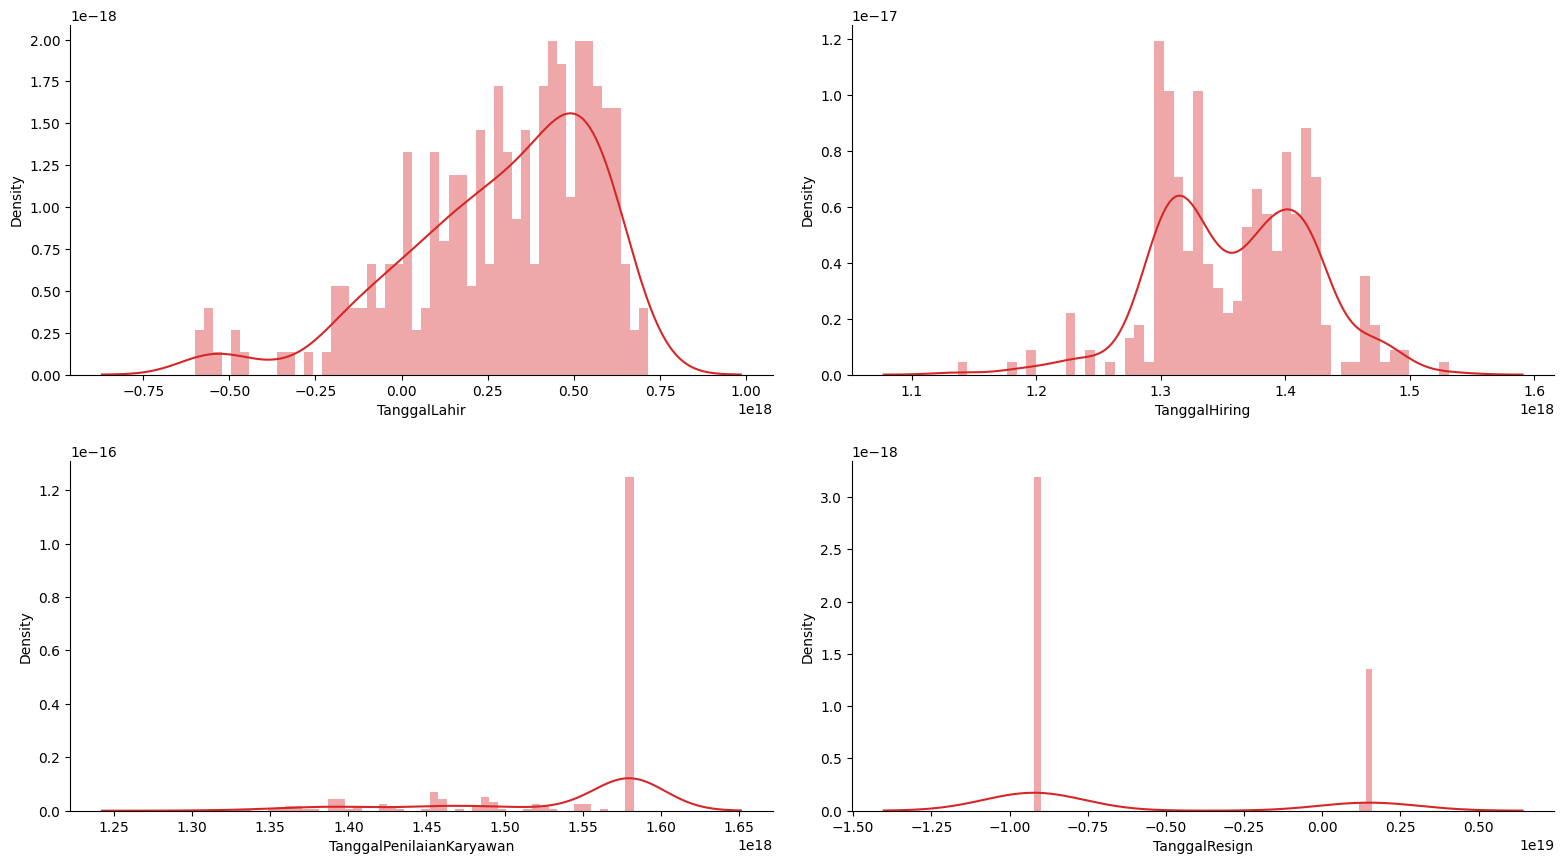

In [887]:
plt.figure(figsize=(16, 9))
for i in range(0, len(date_cols)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[date_cols[i]], bins=50, color='tab:red')
    sns.despine()
    plt.tight_layout(pad=2)

plt.show()

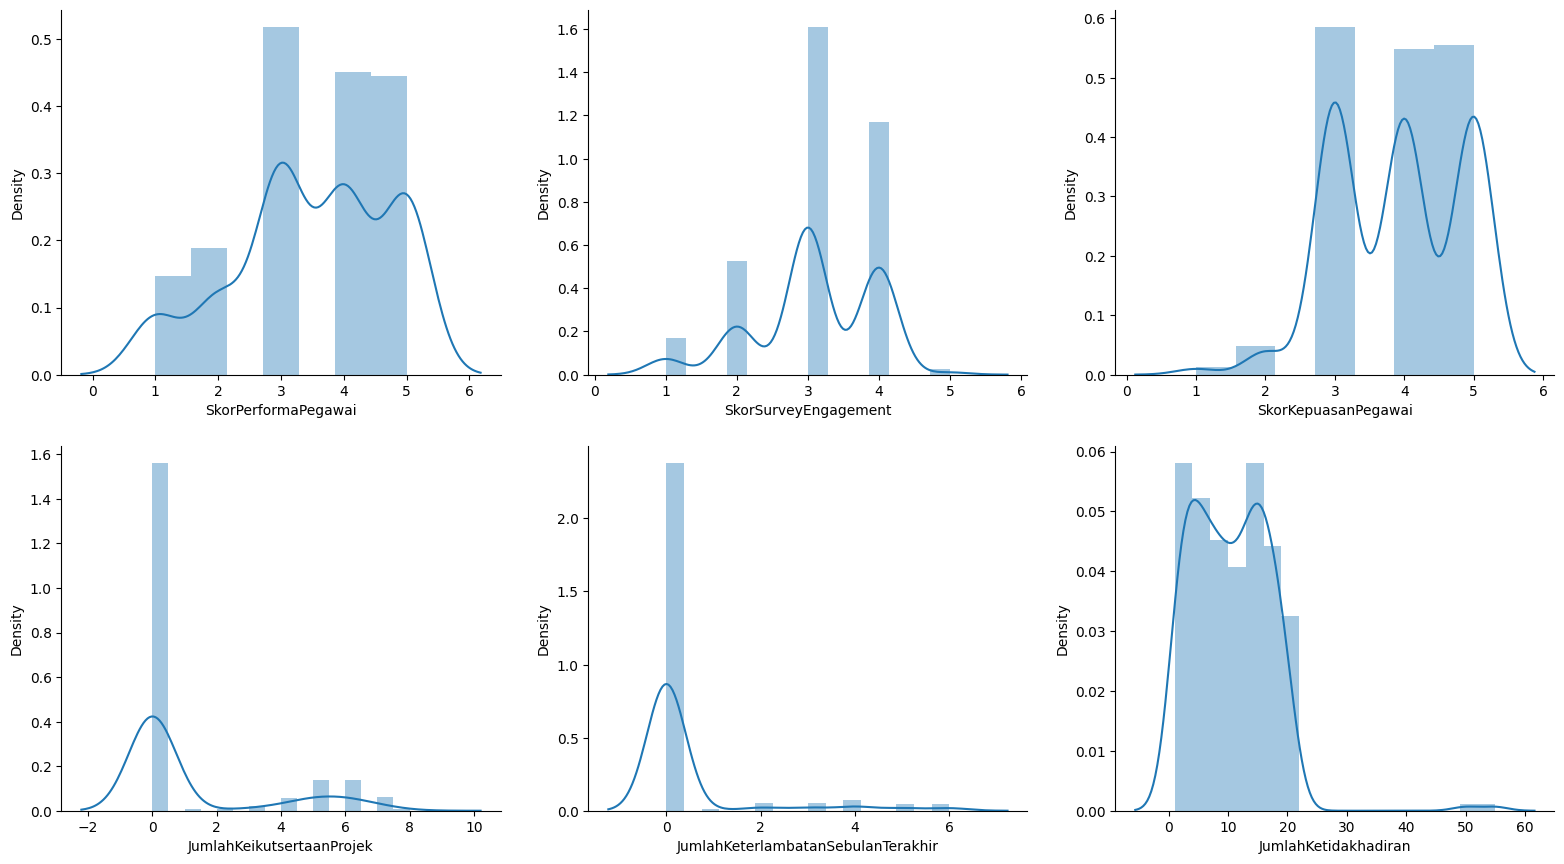

In [888]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[num_cols[i]], color='tab:blue')
    sns.despine()
    plt.tight_layout(pad=2)

plt.show()

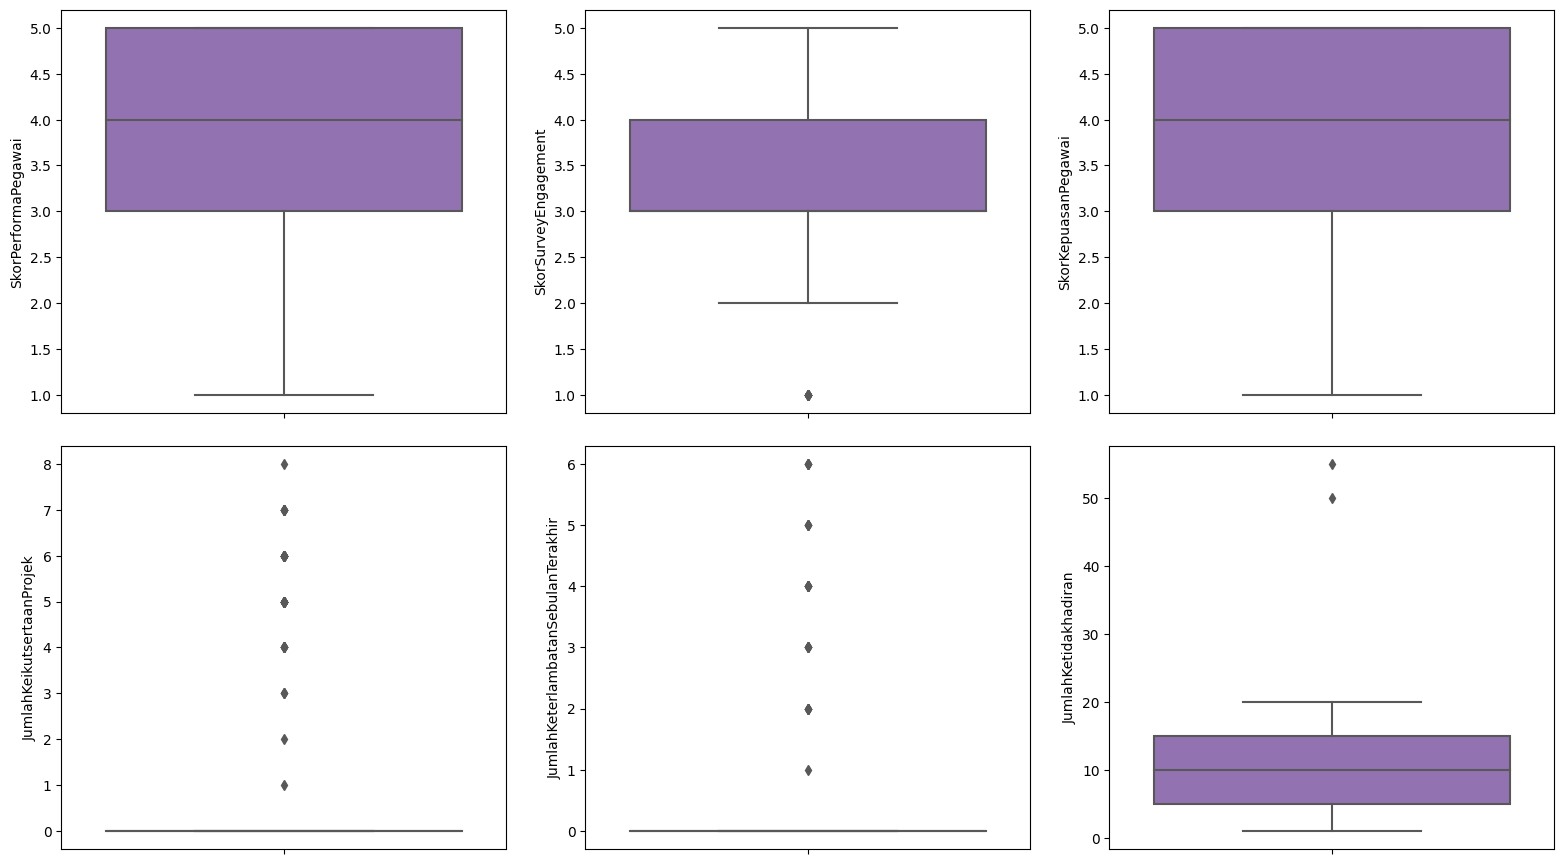

In [889]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[num_cols[i]], color='tab:purple')
    plt.tight_layout(pad=2)

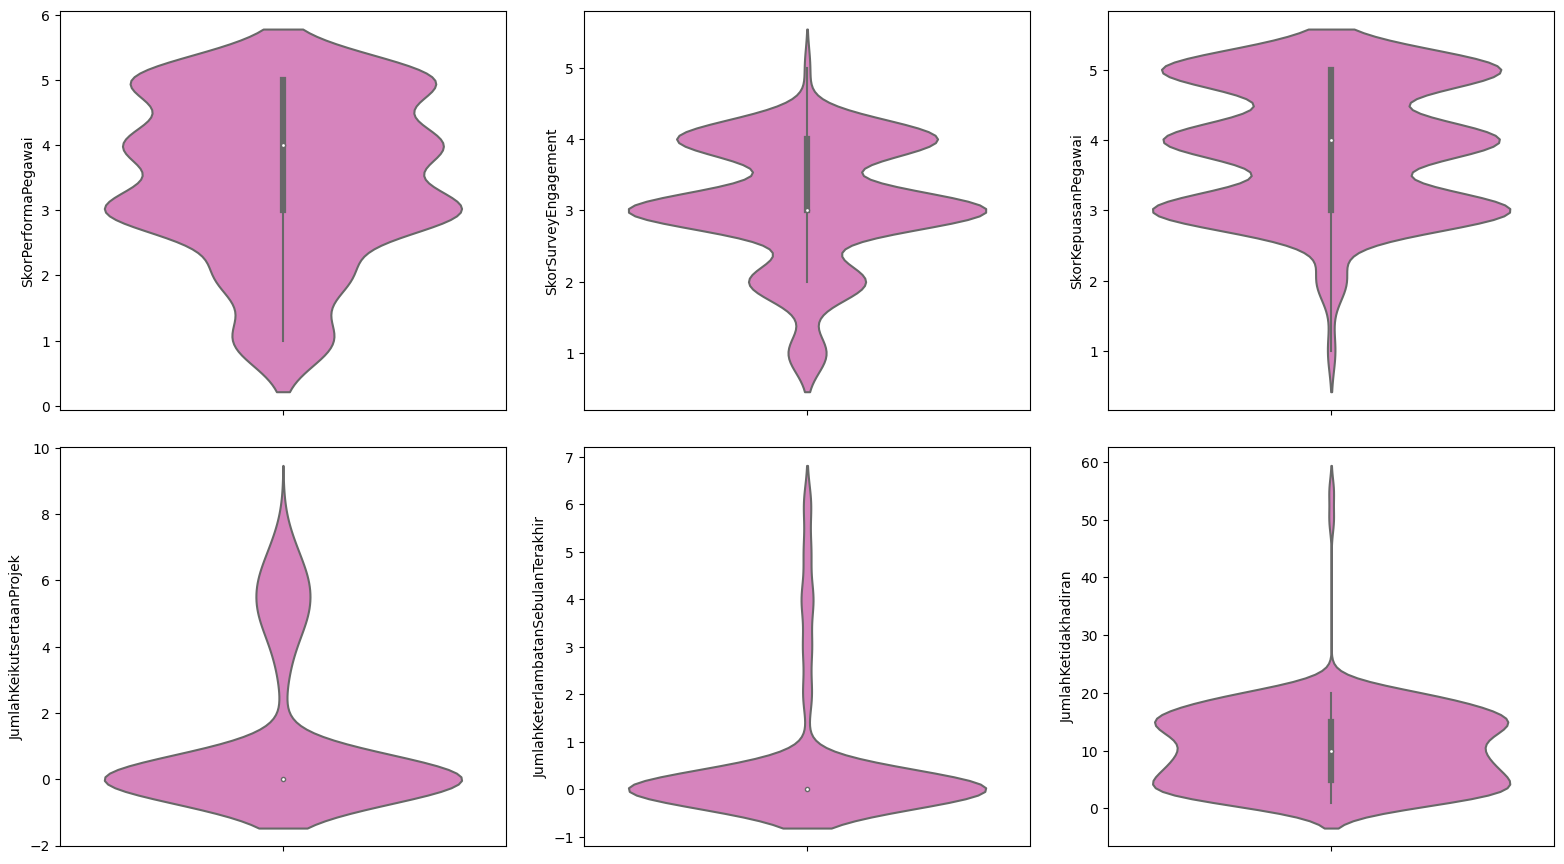

In [890]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=df[num_cols[i]], color='tab:pink')
    plt.tight_layout(pad=2)

🔎 Insights
- Fitur `SkorSurveyEngagement` dan `JumlahKetidakhadiran` memiliki beberapa _outliers_, sehingga kita akan menganalisis lebih lanjut.

🔽 `SkorSurveyEngagement`

In [891]:
df['SkorSurveyEngagement'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [892]:
len(df[df['SkorSurveyEngagement'] < 2])

14

🔽 `JumlahKetidakhadiran`

In [893]:
df['JumlahKetidakhadiran'].unique()

array([ 9,  3, 11,  6, 10, 19,  4,  5,  2, 50, 12, 17, 15,  7, 13, 16, 14,
       20, 18,  1,  8, 55], dtype=int64)

In [894]:
len(df[df['JumlahKetidakhadiran'] > 20])

2

🔎 Observasi
- Fitur `JumlahKetidakhadiran` memiliki 2 data poin yang berupa _outlier_, sehingga akan dihapus.

In [895]:
# Drop outliers
# df = df.drop(df[df['JumlahKetidakhadiran'] > 20].index)
df = df[df['JumlahKetidakhadiran'] <= 20]

#### Categorical Features

In [896]:
cat.describe().T

,count,unique,top,freq
StatusPernikahan,287,3,Belum_menikah,183
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,10,Software Engineer,208
JenjangKarir,287,3,Freshgraduate_program,169
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
TingkatPendidikan,287,3,S1,176
AlasanResign,287,4,masih_bekerja,198


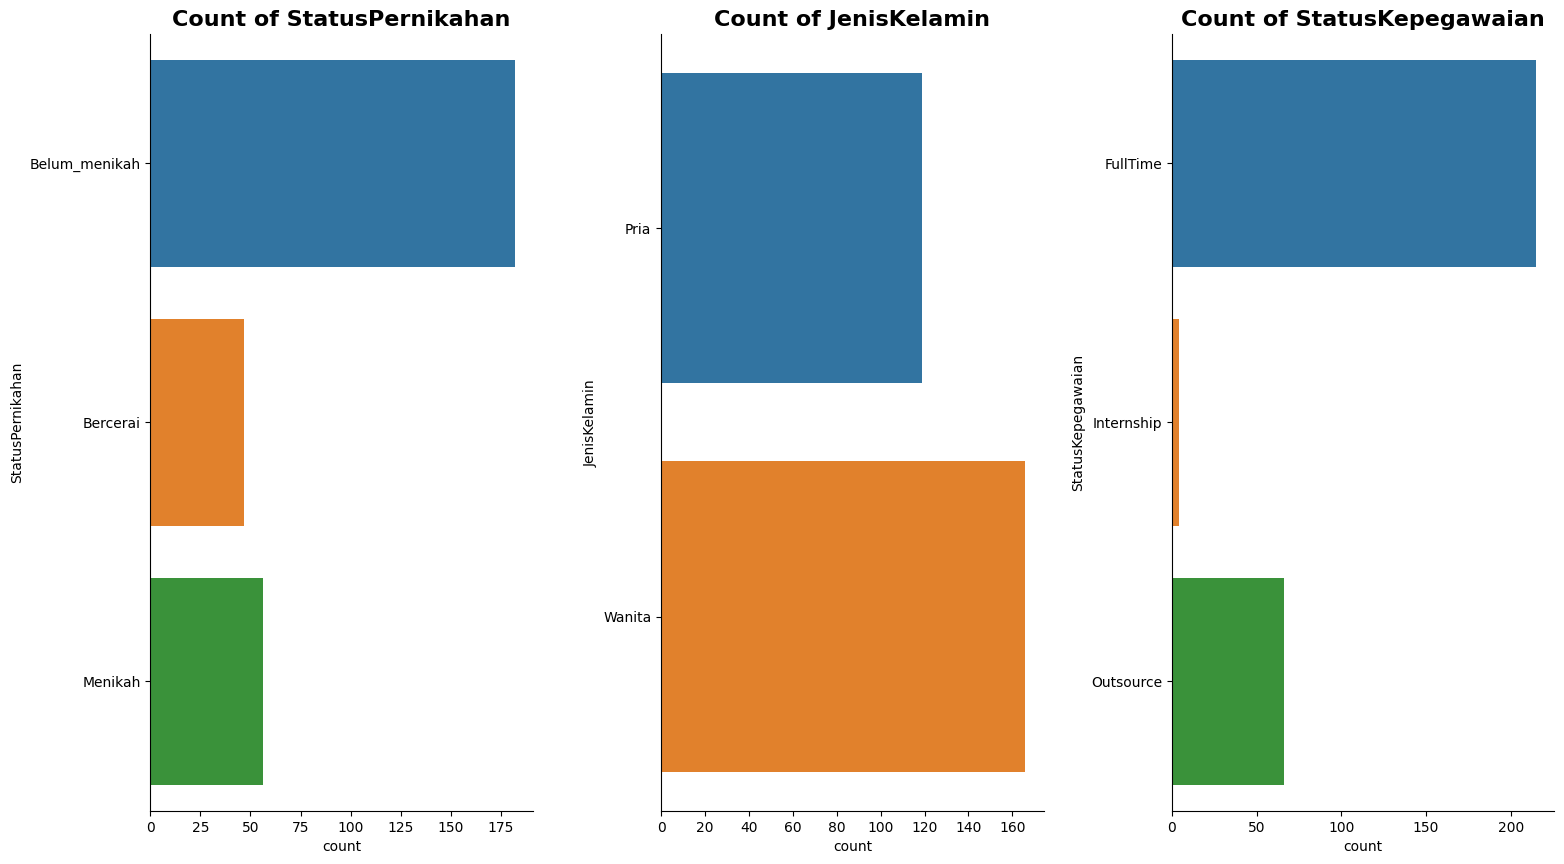

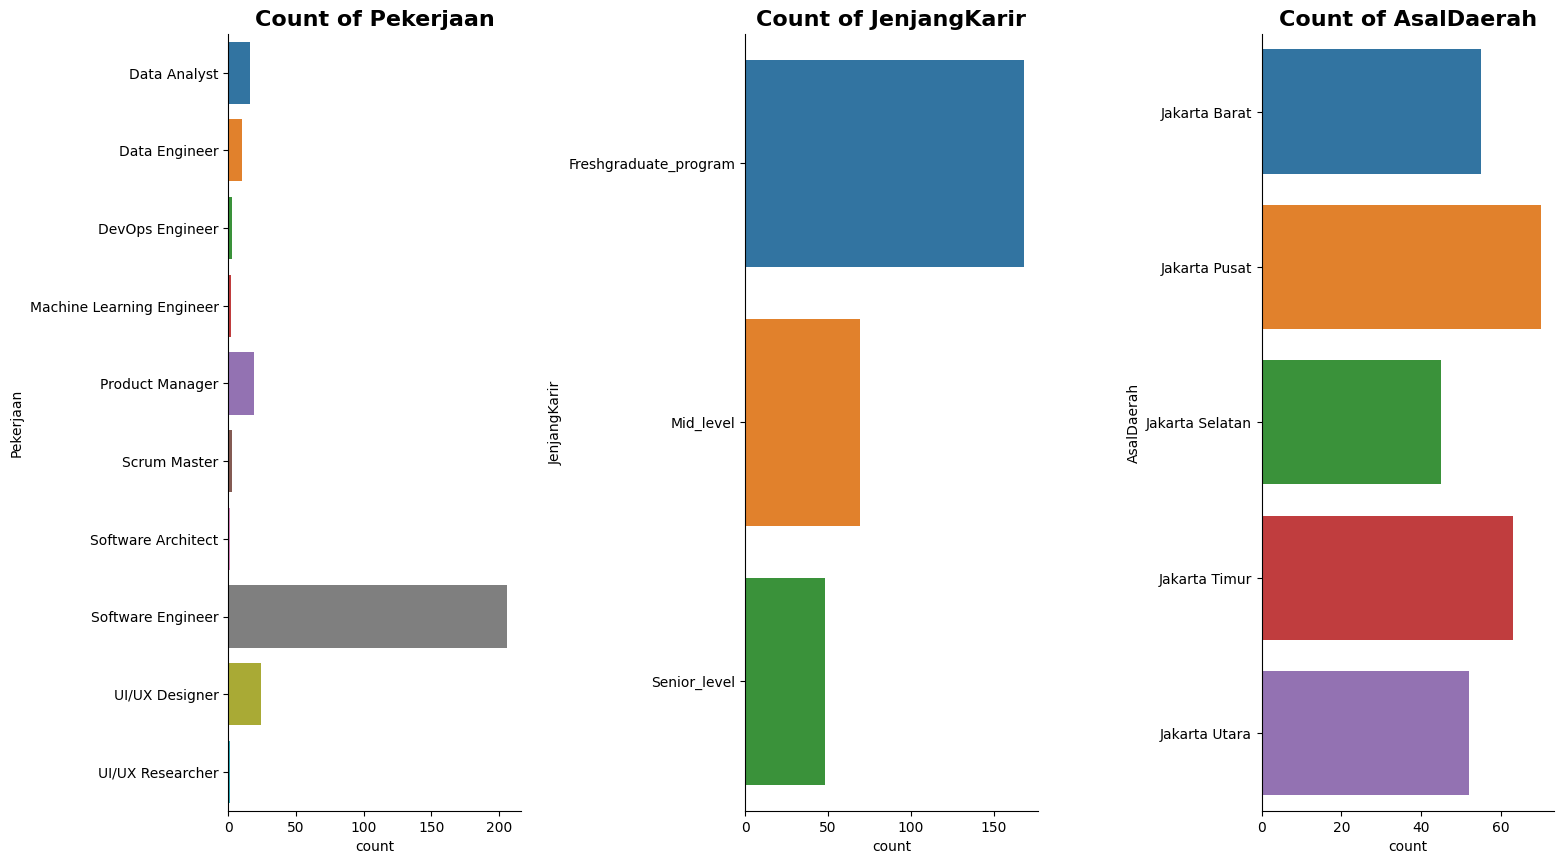

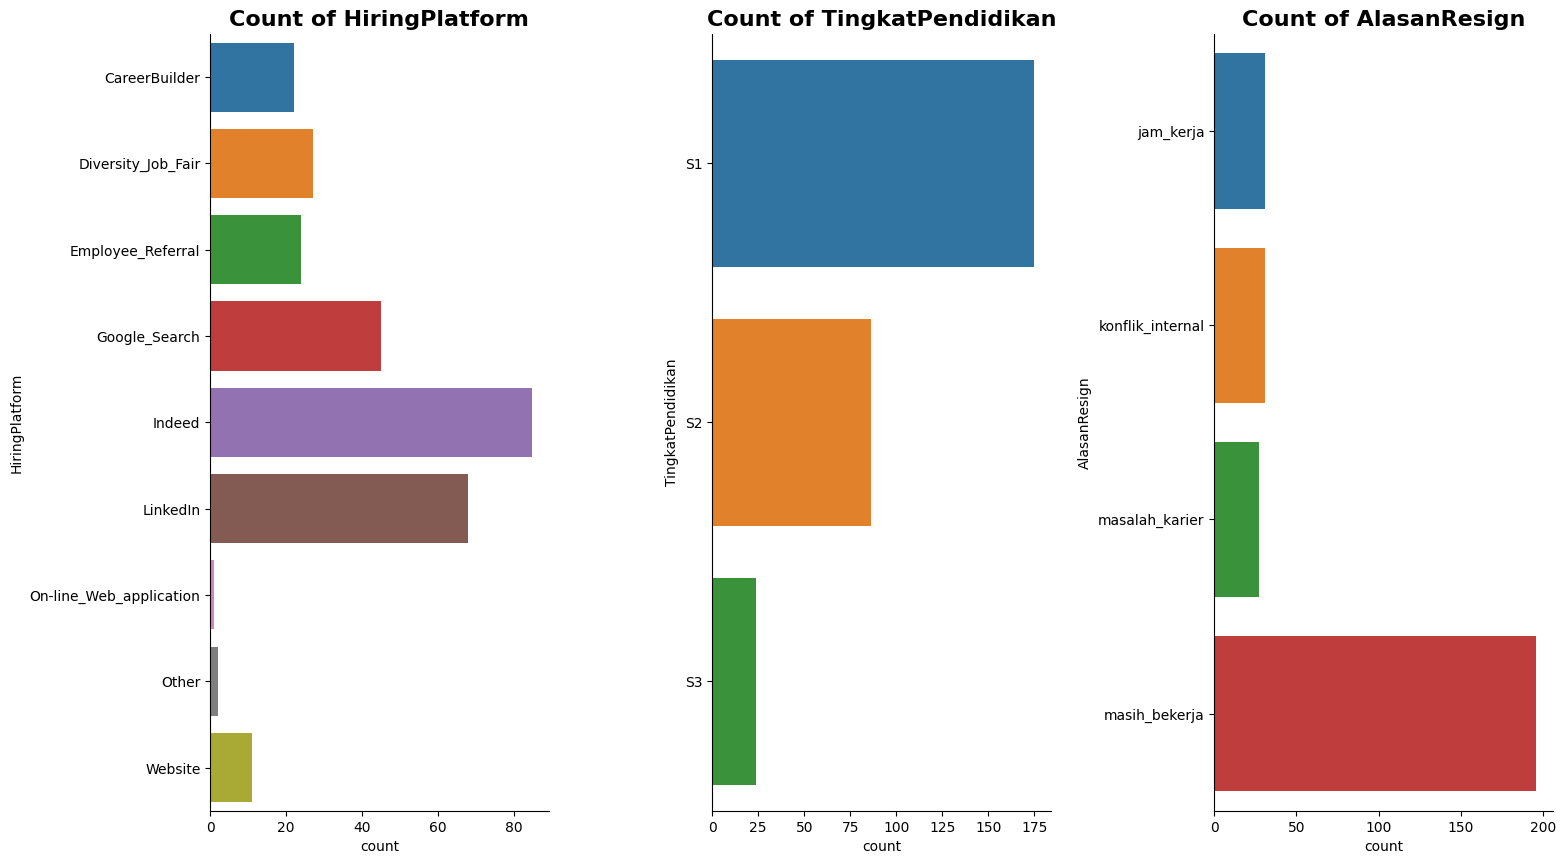

<Figure size 1600x900 with 0 Axes>

In [897]:
plt.figure(figsize=(16, 9))

# Subplot
for j in range(3):
    start_index = j * 3
    end_index = (j + 1) * 3
    for i in range(start_index, end_index):
        plt.subplot(1, 3, i % 3 + 1)
        ax = sns.countplot(y=df[cat_cols[i]], palette='tab10')
        plt.title(f'Count of {cat_cols[i]}', fontsize=16, weight='bold')
        sns.despine()
        plt.tight_layout(pad=2)

    plt.figure(figsize=(16, 9))

plt.show()

### Bivariate Analysis

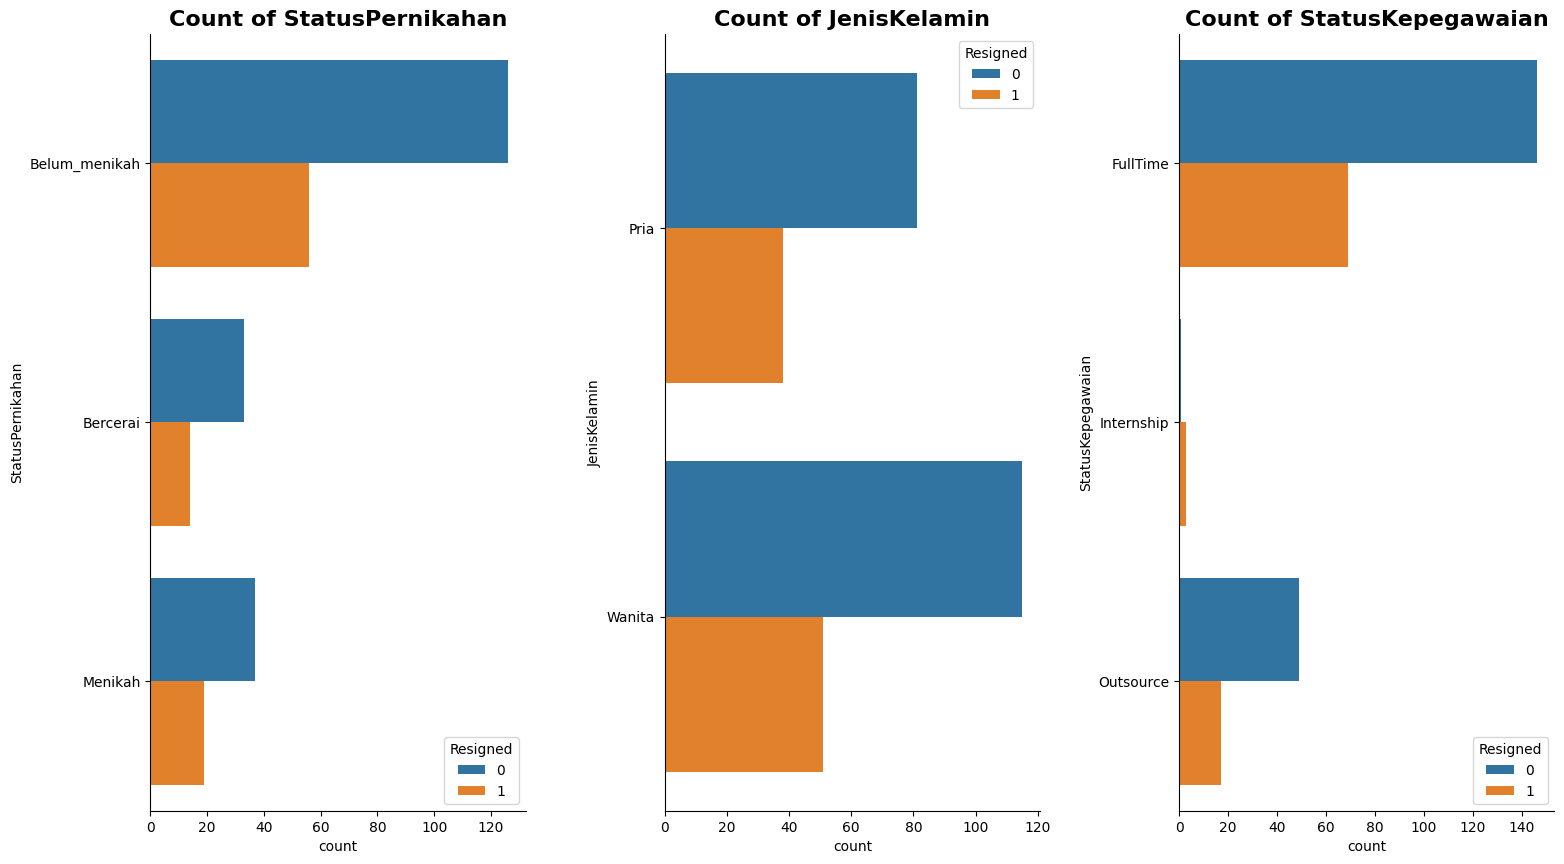

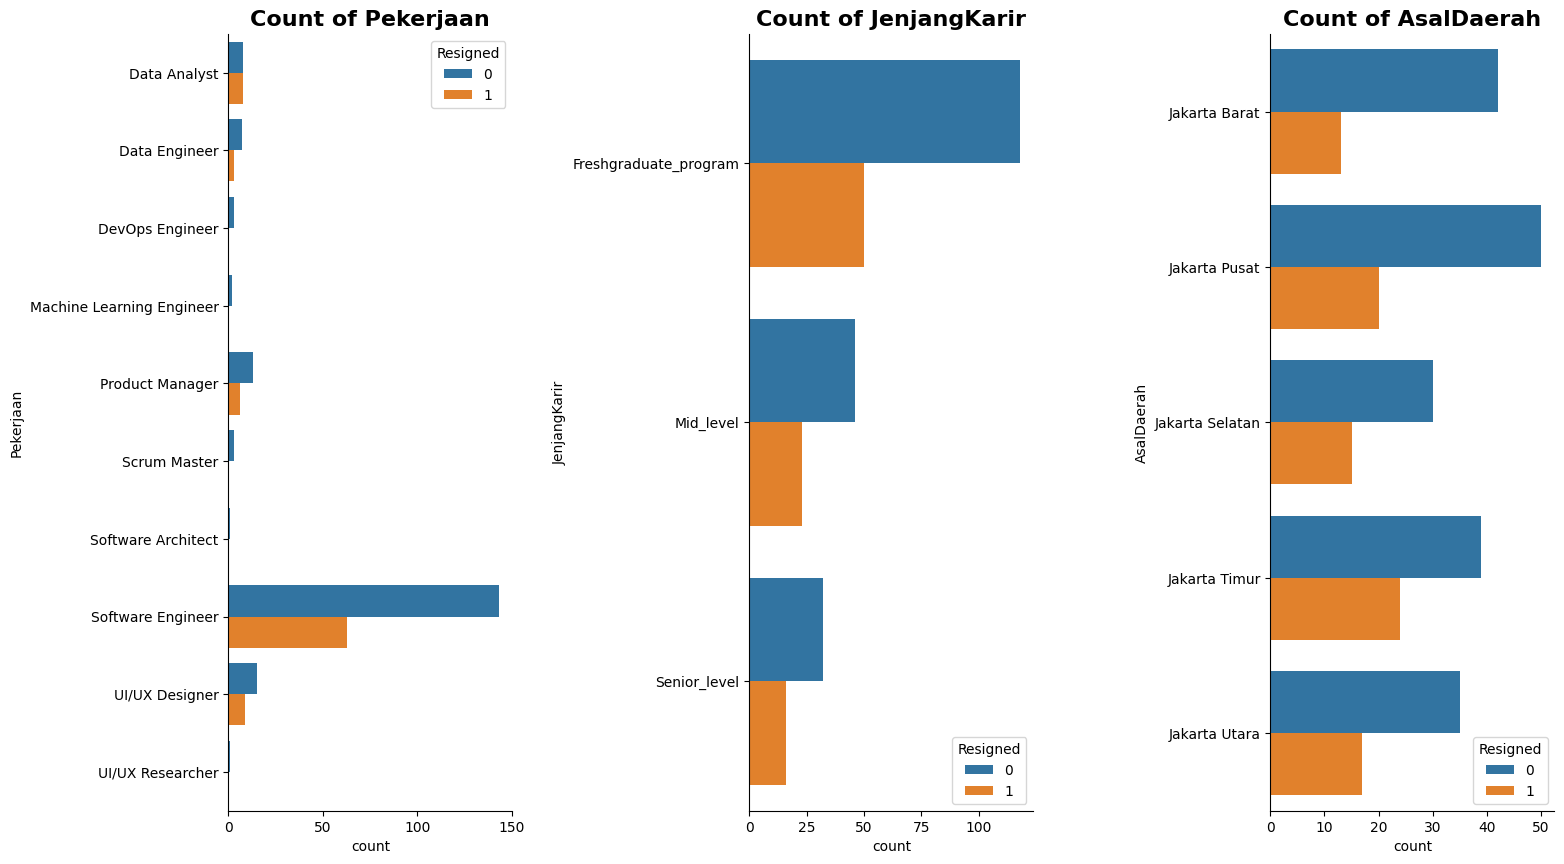

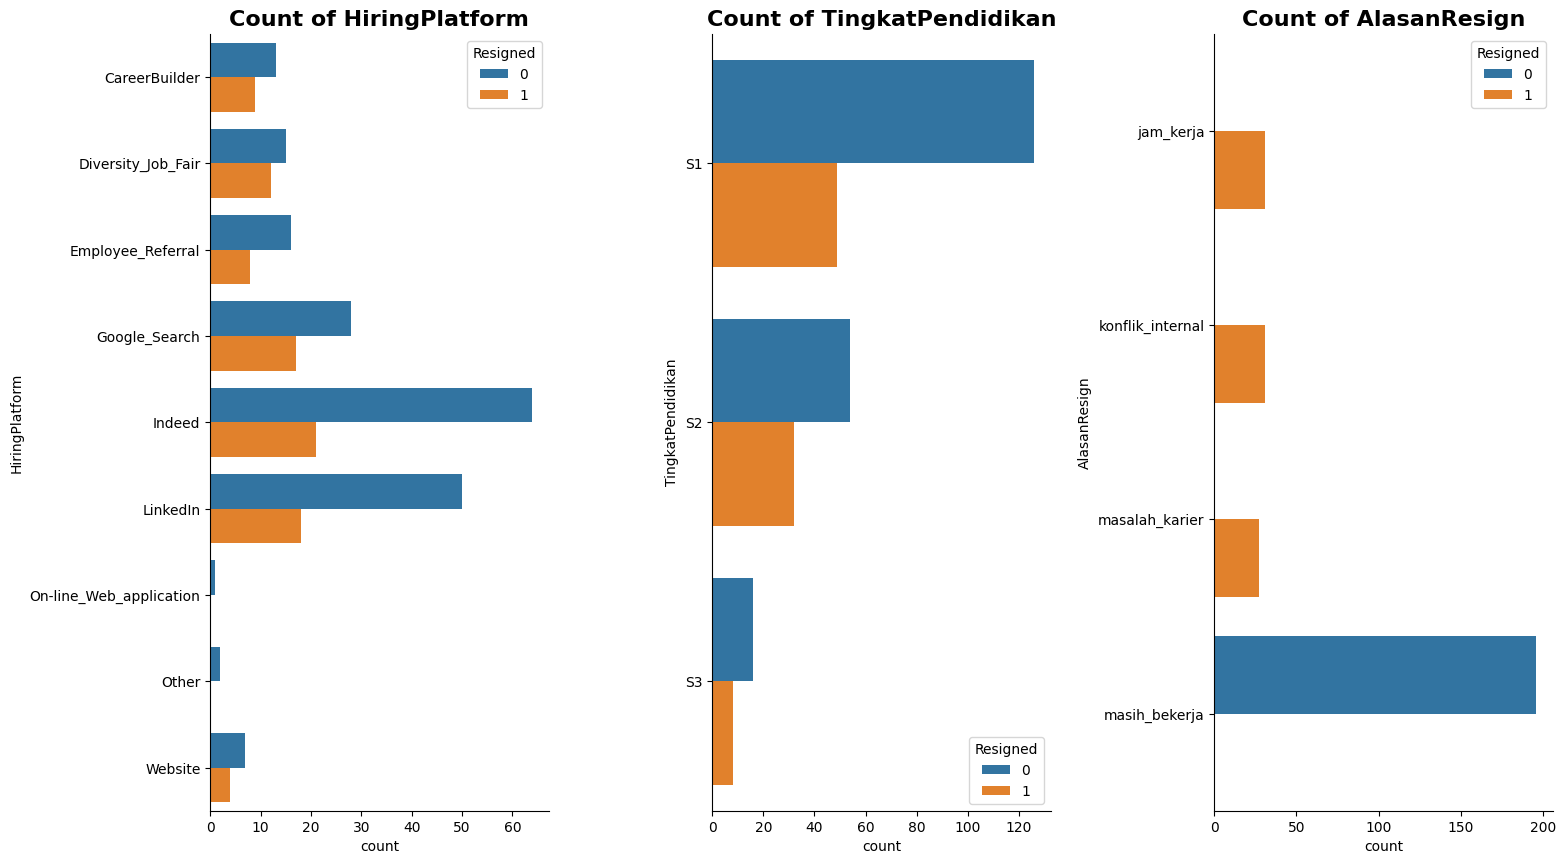

<Figure size 1600x900 with 0 Axes>

In [898]:
plt.figure(figsize=(16, 9))

# Subplot
for j in range(3):
    start_index = j * 3
    end_index = (j + 1) * 3
    for i in range(start_index, end_index):
        plt.subplot(1, 3, i % 3 + 1)
        ax = sns.countplot(data=df, y=df[cat_cols[i]], hue='Resigned', palette='tab10')
        plt.title(f'Count of {cat_cols[i]}', fontsize=16, weight='bold')
        sns.despine()
        plt.tight_layout(pad=2)

    plt.figure(figsize=(16, 9))

plt.show()

### Multivariate Analysis

<Figure size 1600x900 with 0 Axes>

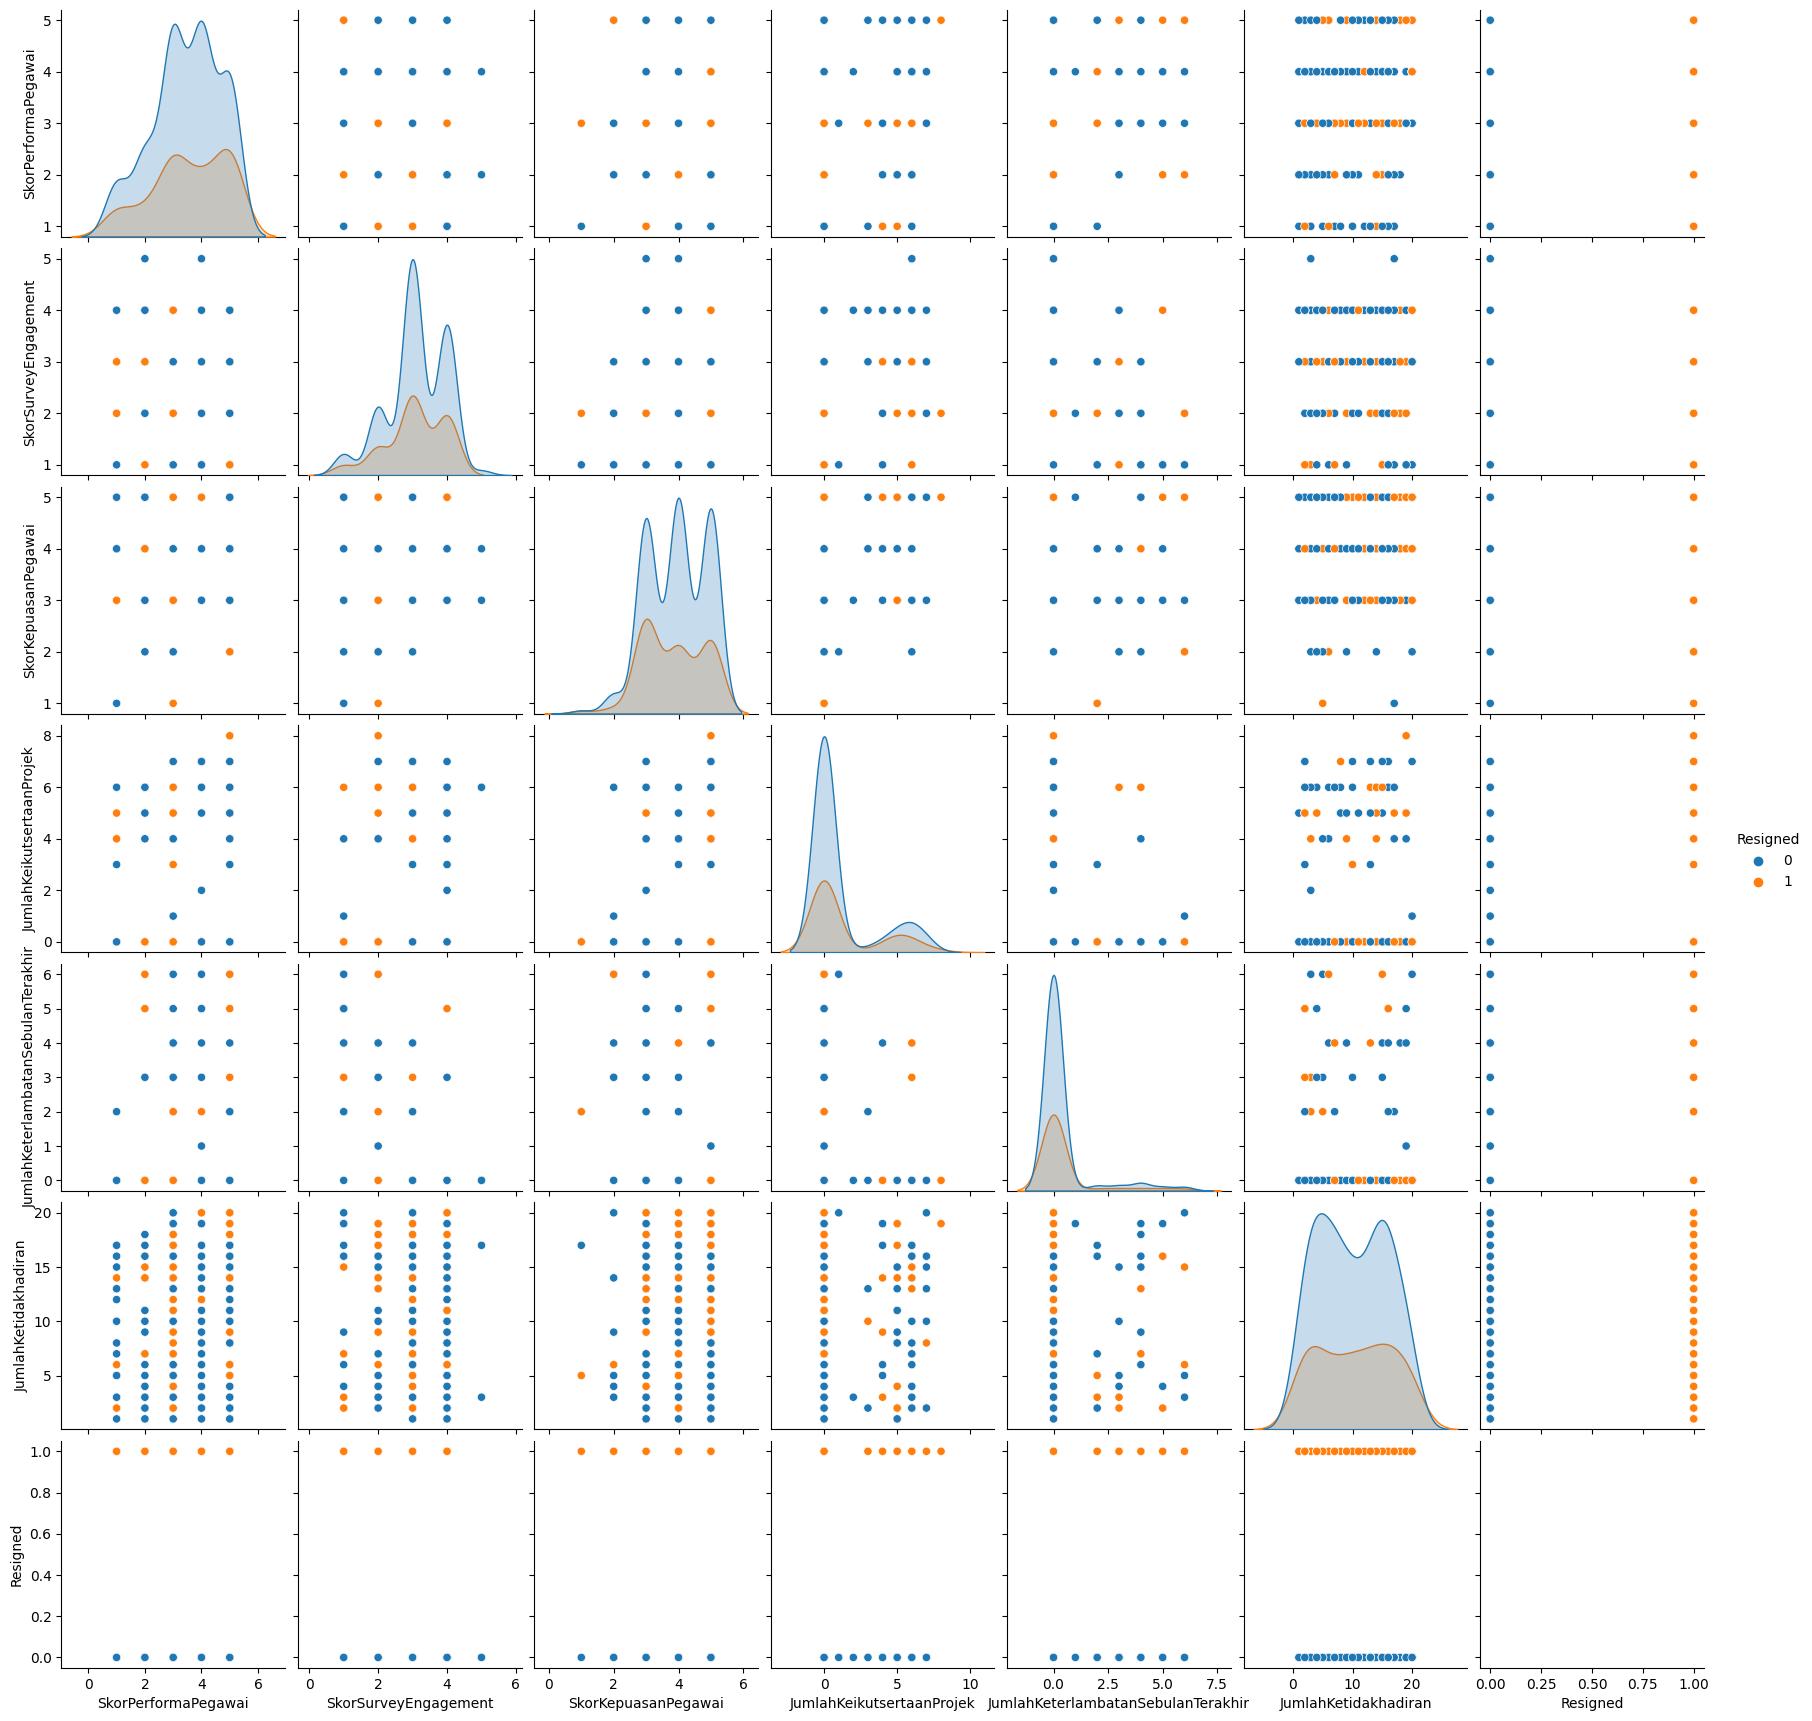

In [899]:
plt.figure(figsize=(16, 9))
sns.pairplot(data=df, vars=num.columns, hue='Resigned', palette='tab10')
plt.show()

### Correlation Matrix

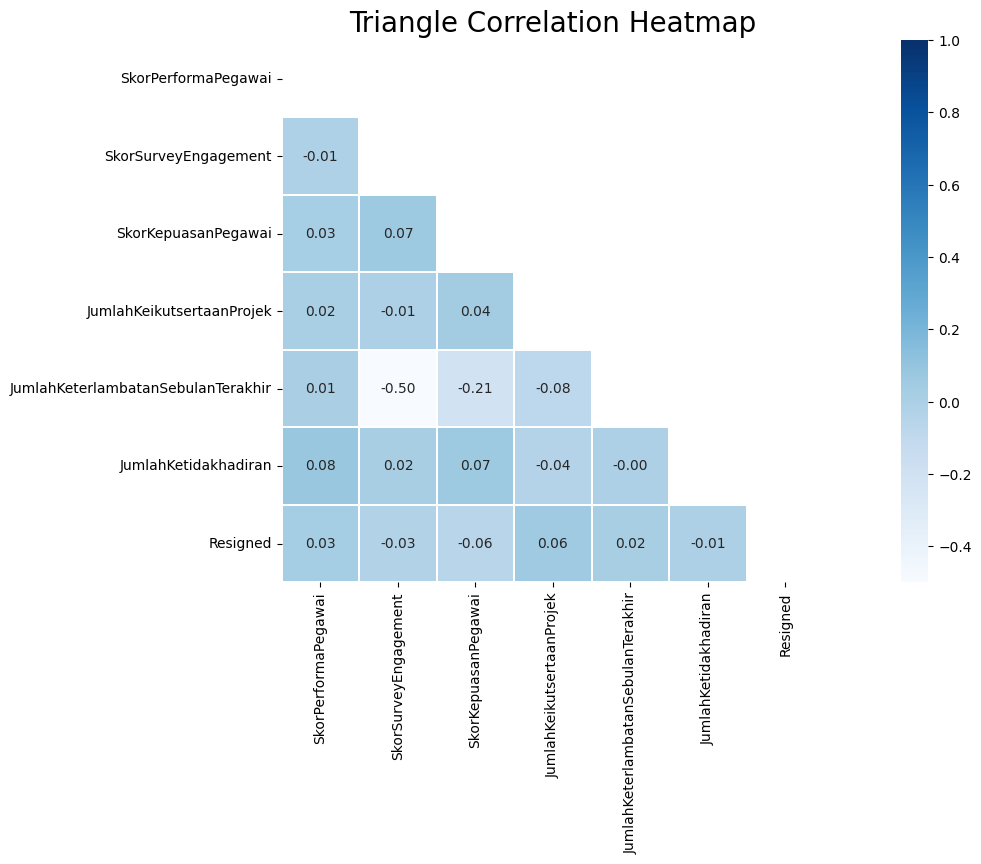

In [900]:
# Correlation plot
plt.figure(figsize=(16, 9))
corrmat = num.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask=mask, cmap='Blues', annot=True, fmt='.2f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={'fontsize':10})
plt.title('Triangle Correlation Heatmap', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

🔎 Insights
- Tidak ada _multicollinearity_. 

## Feature Engineering

In [901]:
# Create new columns derived from existing columns
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunHiring'] = df['TahunHiring'].astype('Int64')

df['TahunResign'] = df['TanggalResign'].dt.year
df['TahunResign'] = df['TahunResign'].astype('Int64') # Prevent the occurrence of IntCastingNaNError

In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    category      
 1   JenisKelamin                        285 non-null    category      
 2   StatusKepegawaian                   285 non-null    category      
 3   Pekerjaan                           285 non-null    category      
 4   JenjangKarir                        285 non-null    category      
 5   SkorPerformaPegawai                 285 non-null    int64         
 6   AsalDaerah                          285 non-null    category      
 7   HiringPlatform                      285 non-null    category      
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    int64         
 10  JumlahKeikutsertaanProjek      

In [903]:
annual_hiring = df[['TahunHiring', 'TanggalHiring']].groupby('TahunHiring').agg({'TanggalHiring':'count'}).reset_index().rename(columns={'TahunHiring'   : 'Tahun',
                                                                                                                                         'TanggalHiring' : 'JumlahHiring'})
annual_hiring

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,75
6,2012,41
7,2013,42
8,2014,56
9,2015,31


In [904]:
annual_resign = df[['TahunResign', 'TanggalResign']].groupby('TahunResign').agg({'TanggalResign':'count'}).reset_index().rename(columns={'TahunResign'   : 'Tahun',
                                                                                                                                         'TanggalResign' : 'JumlahResign'})
annual_resign

,Tahun,JumlahResign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


In [905]:
annual_turnover = annual_hiring.merge(annual_resign, how='outer', on='Tahun')
annual_turnover = annual_turnover.fillna(0).astype('int64')
annual_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,75,0
6,2012,41,0
7,2013,42,5
8,2014,56,12
9,2015,31,8


In [906]:
annual_turnover['PerubahanKaryawan'] = annual_turnover['JumlahHiring'] - annual_turnover['JumlahResign']
     
total_karyawan = 0
list_jumlah_karyawan = []

for i in range(len(annual_turnover)):
    total_karyawan += annual_turnover['PerubahanKaryawan'][i]
    list_jumlah_karyawan.append(total_karyawan)

list_jumlah_karyawan

[1, 3, 5, 12, 20, 95, 136, 173, 217, 240, 246, 232, 207, 202, 196]

In [907]:
annual_turnover['TotalKaryawan'] = list_jumlah_karyawan
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan
0,2006,1,0,1,1
1,2007,2,0,2,3
2,2008,2,0,2,5
3,2009,7,0,7,12
4,2010,8,0,8,20
5,2011,75,0,75,95
6,2012,41,0,41,136
7,2013,42,5,37,173
8,2014,56,12,44,217
9,2015,31,8,23,240


In [908]:
# Total Hiring
total_hiring = 0
list_total_hiring = []

for i in range(len(annual_turnover)):
    total_hiring += annual_turnover['JumlahHiring'][i]
    list_total_hiring.append(total_hiring)
    
annual_turnover['TotalHiring'] = list_total_hiring

# Total Resign
total_resign = 0
list_total_resign = []

for i in range(len(annual_turnover)):
    total_resign += annual_turnover['JumlahResign'][i]
    list_total_resign.append(total_resign)

annual_turnover['TotalResign'] = list_total_resign

annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan,TotalHiring,TotalResign
0,2006,1,0,1,1,1,0
1,2007,2,0,2,3,3,0
2,2008,2,0,2,5,5,0
3,2009,7,0,7,12,12,0
4,2010,8,0,8,20,20,0
5,2011,75,0,75,95,95,0
6,2012,41,0,41,136,136,0
7,2013,42,5,37,173,178,5
8,2014,56,12,44,217,234,17
9,2015,31,8,23,240,265,25


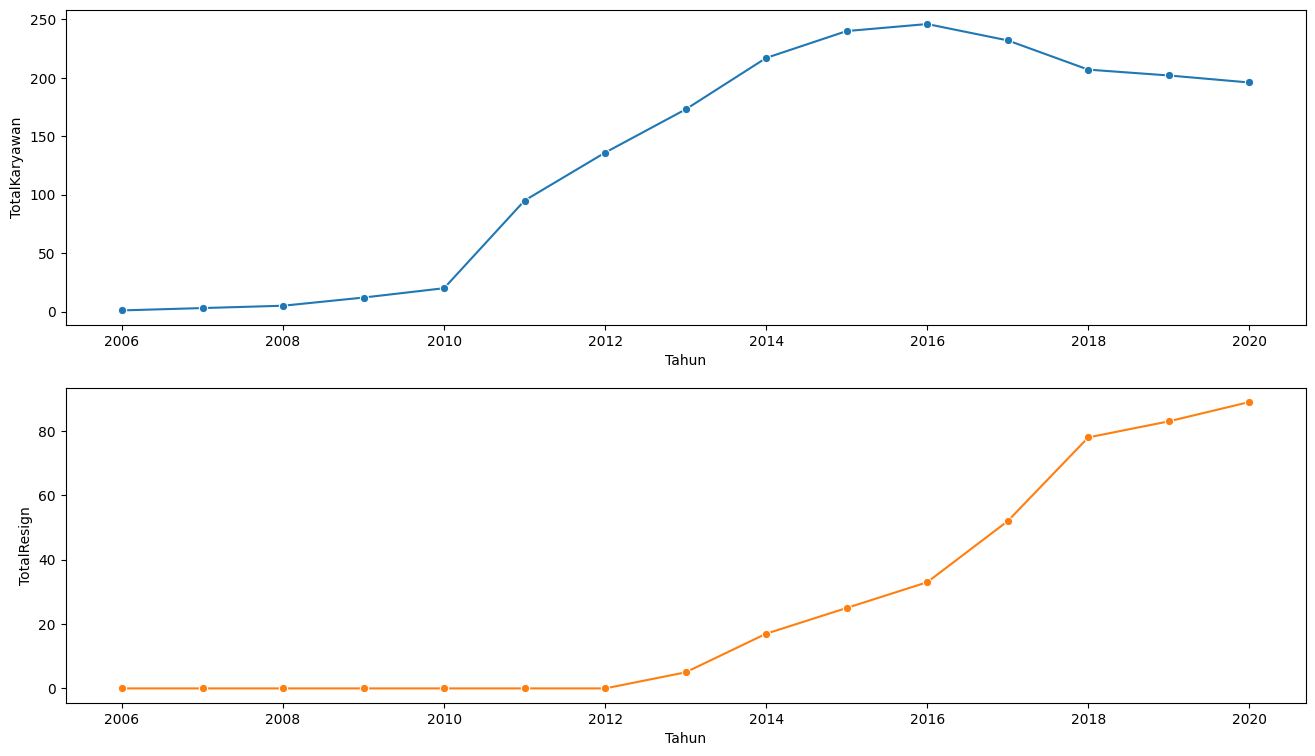

In [909]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 1, 1)
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalKaryawan', marker='o', color='tab:blue')
plt.subplot(2, 1, 2)
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalResign', marker='o', color='tab:orange')
plt.show()

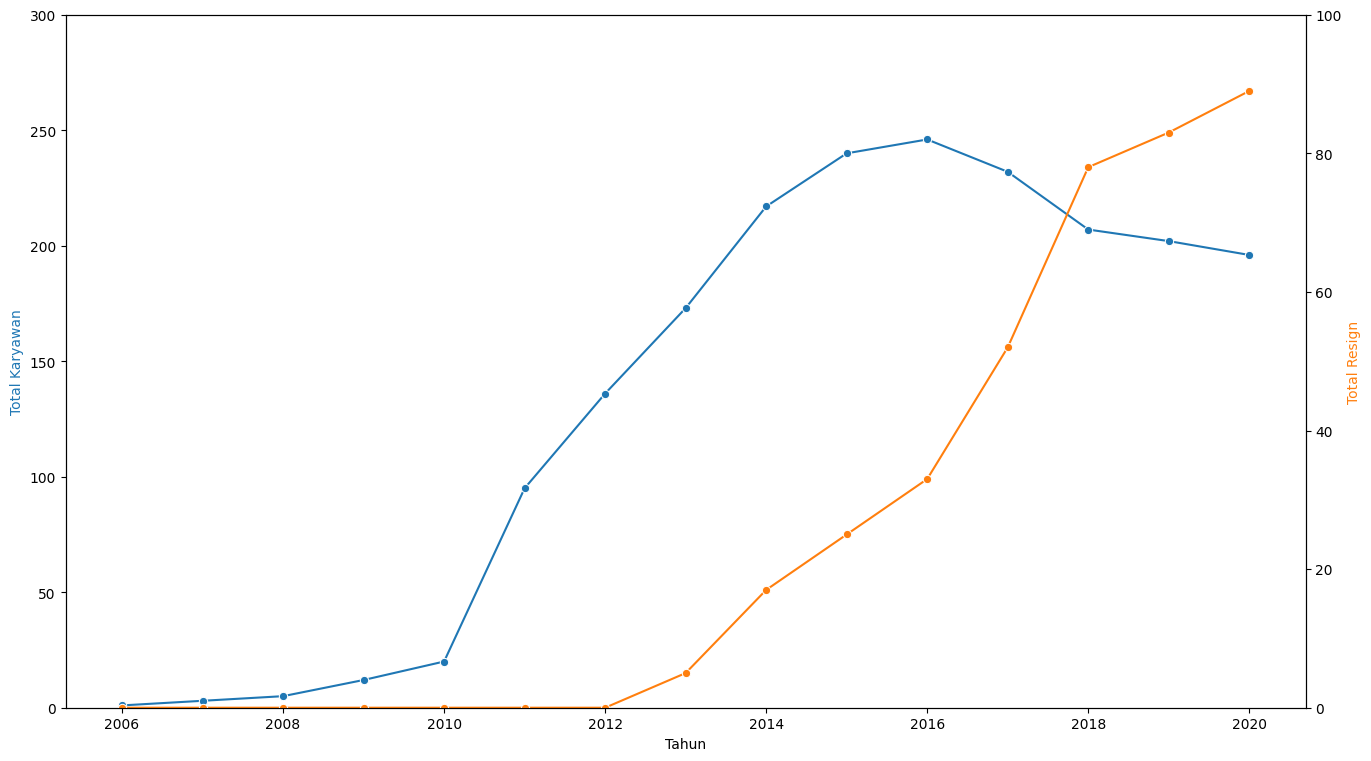

In [910]:
fig, ax1 = plt.subplots(figsize=(16, 9))

ax2 = ax1.twinx()
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalKaryawan', marker='o', color='tab:blue', ax=ax1)
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalResign', marker='o', color='tab:orange', ax=ax2)

ax1.set_ylabel('Total Karyawan', color='tab:blue')
ax1.set_ylim(0, 300)
ax2.set_ylabel('Total Resign', color='tab:orange')
ax2.set_ylim(0, 100)

plt.show()